<a href="https://colab.research.google.com/github/mohammedterry/NLP_for_ML/blob/master/Entity_Linking.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# DBPedia

In [0]:
example_name = '_'.join([word[0].upper() + word[1:] for word in input().split()])
example_name

albert einstein


'Albert_Einstein'

In [0]:
import requests

dbpedia_json = f"http://dbpedia.org/data/{example_name}.json"
data = requests.get(dbpedia_json).json()

In [0]:
related_entities = {}
for entity,relations in data.items():
  entity = entity.split('/')[-1]
  for relation in relations:
    if "ontology" in relation:
      relation = relation.split('/ontology/')[-1]
      if entity != example_name:
        if relation in related_entities:
          related_entities[relation].add(entity)
        else:
          related_entities[relation] = {entity}
person = data[dbpedia_json.replace('/data/','/resource/')[:-5]]
for relation,entities in person.items():
  relation = relation.split('/')[-1]
  if relation.isalpha():
    for entity in entities:
      entity = str(entity["value"]).split('/')[-1].split('Category:')[-1]
      if relation in related_entities:
        related_entities[relation].add(entity)
      else:
        related_entities[relation] = {entity}
related_entities

{'abstract': {'12 in Österreich-Ungarn auch Bürger Österreichs. Von 1914 bis 1932 lebte Einstein in Berlin und war als Bürger Preußens erneut Staatsangehöriger im Deutschen Reich. Mit der „Machtergreifung“ Hitlers gab er 1933 den deutschen Pass endgültig ab. Zusätzlich zu seinem seit 1901 geltenden Schweizer Bürgerrecht erwarb er 1940 noch die amerikanische Staatsbürgerschaft.',
  '; German: [ˈalbɛɐ̯t ˈaɪnʃtaɪn] ; 14 March 1879 – 18 April 1955) was a German-born theoretical physicist. He developed the general theory of relativity, one of the two pillars of modern physics (alongside quantum mechanics). Einstein\'s work is also known for its influence on the philosophy of science. Einstein is best known in popular culture for his mass–energy equivalence formula E = mc2 (which has been dubbed "the world\'s most famous equation"). He received the 1921 Nobel Prize in Physics for his "services to theoretical physics", in particular his discovery of the law of the photoelectric effect, a pivo

In [0]:
from random import choice
relation = choice(list(related_entities.keys()))
print(f"{example_name.replace('_',' ')} - {relation} - {[entity.replace('_',' ') for entity in related_entities[relation]]}")

Albert Einstein - influenced - ['Ernst Mach', 'Gunnar Nordström', 'Leó Szilárd', 'Ernst G. Straus', 'Baruch Spinoza', 'David Hume', 'Nathan Rosen', 'Moritz Schlick', 'Johann Heinrich Pestalozzi', 'Henry George', 'Karl Pearson']


# Wikipedia

In [0]:
import requests

wikipedia_url = "https://en.wikipedia.org/wiki/" + example_name
result = requests.get(wikipedia_url)

In [0]:
from bs4 import BeautifulSoup as bs

soup = bs(result.text, "html.parser")
related_entities = set()
for a in soup.find_all("a"):
    href = a.get("href")
    if href is not None and "/wiki/" in href and ":" not in href and "Main_Page" not in href:
      entity = a.text.strip()
      if entity not in ("read","article") and len(entity) > 0:
        related_entities.add(entity)

print(related_entities) 

{'Hypothetico-deductive model', 'Becquerel', 'Gravitational wave background (GWB)', "Einstein's unsuccessful investigations", 'Hofstadter', 'Koshiba', 'Hänsch', 'Kaiser Wilhelm Institute', 'LNB', 'Vera Weizmann', 'Bose–Einstein statistics', 'Hall', "'t Hooft", 'Fellows', 'János Plesch', 'Rabi', 'quanta', 'Article', 'Inhomogeneous cosmology', 'Scientific law', 'Hugh of Saint Victor', 'Goeppert Mayer', 'List of peace activists', 'City Lights', 'photon', 'Einstein Prize for Laser Science', 'Arthur Schuster', 'Chadwick', 'Perl', 'Newtonian mechanics', 'Karl Pearson', 'neutron stars', 'J. J. Thomson', 'Nakamura', 'Constructivist epistemology', 'Deductive-nomological model', 'Logic', 'Pierre Duhem', 'luminiferous ether', 'Dirac', 'Eduard', 'assistant examiner – level III', 'Hebrew University of Jerusalem', 'pacifist', 'quotations', 'Braun', 'gauge symmetry', 'Frank', 'Schawlow', 'agnostic', 'Classical unified field theories', 'Galaxy filament', 'gymnasium', 'James Dewar', 'Jimmy Walker', "No

(-0.5, 799.5, 799.5, -0.5)

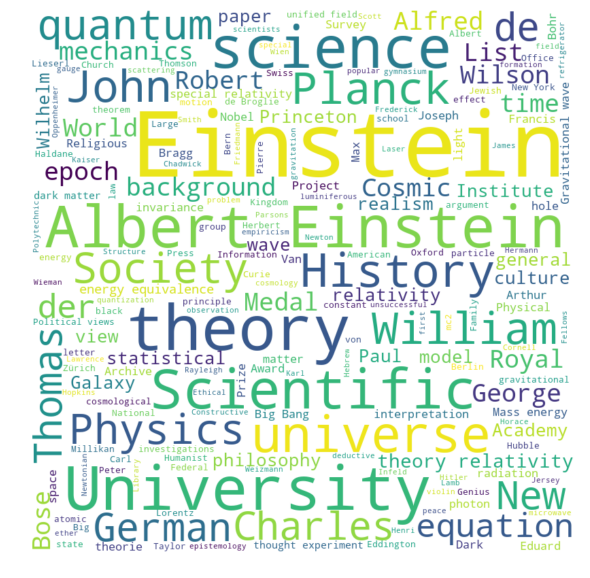

In [0]:
from matplotlib import pyplot as plt
from wordcloud import WordCloud

wordcloud = WordCloud(width = 800, height = 800, background_color ='white', min_font_size = 10).generate(' '.join(related_entities))

plt.figure(figsize=[20,10])
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

# Expanding Date Entities

In [44]:
example_date = input()

Dec 25


In [45]:
from dateutil import parser
try:
  datetime = parser.parse(example_date)
except:
  datetime = "unrecognised date!"
datetime

datetime.datetime(2019, 12, 25, 0, 0)

In [46]:
stndrd,th = ["st","nd","rd"], ["th"] 

import pandas as pd 
dt = pd.to_datetime(datetime)
date_time = {
                    "phrase":example_date,
                    "date": f"{dt.day}/{dt.month}/{dt.year}",
                    "time": f"{dt.hour}:{dt.minute}:{dt.second}",
                    "month":("January","February","March","April","May","June","July","August","September","October","November","December")[dt.month -1],
                    "day":("Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday")[dt.dayofweek],
                    "day of year":dt.dayofyear,
                    "suffix":f"{dt.day}{(stndrd + th*17 + stndrd + th * 7 + stndrd)[dt.month - 1]}",
                    "is month end":dt.is_month_end,
                    "is month start":dt.is_month_start,
                    "is quarter end":dt.is_quarter_end,
                    "is quarter start":dt.is_quarter_start,
                    "is year start":dt.is_year_start,
                    "is year end":dt.is_year_end,
                    "is weekend":dt.dayofweek in (6,7),
    }

date_time

{'date': '25/12/2019',
 'day': 'Wednesday',
 'day of year': 359,
 'is month end': False,
 'is month start': False,
 'is quarter end': False,
 'is quarter start': False,
 'is weekend': False,
 'is year end': False,
 'is year start': False,
 'month': 'December',
 'phrase': 'Dec 25',
 'suffix': '25th',
 'time': '0:0:0'}

In [47]:
example_date = f"{date_time['suffix']} {date_time['month']}"
example_date

'25th December'

# Google Correlate

In [39]:
from random import choice

time_frame = choice(("weekly","monthly"))
country_code = choice(("uk","us"))

print(time_frame,country_code)

monthly us


In [40]:
import requests
gcorrelate_url = f"https://www.google.com/trends/correlate/search?e={example_date}&t={time_frame}&p={country_code}"
result = requests.get(gcorrelate_url)

from bs4 import BeautifulSoup as bs
soup = bs(result.text, "html.parser") 

correlated = set()
for entities in soup.find_all("li",attrs={"class":"result"}):
  for entity in entities:
    entity = entity.text.strip()
    for ent in entity.split('\n'):
      try:
        float(ent)
      except:
        correlated.add(ent)

print(correlated)

{'what is open on christmas', 'christmas mass times', 'ball drop', 'the christmas story in the bible', 'week 16', 'week 14', 'family friendly new years eve', 'cast of a christmas story', 'nye fireworks', '28 december', 'xmas eve', 'where to see santa', 'on christmas', '10th december', 'cast of white christmas', 'what time was jesus born', 'merry christmas message', 'christmas football', 'restaurants open christmas eve', 'watch ball drop', 'prospero año', 'prime rib per person', '25 december', 'the ball drop', 'funny white elephant', 'christmas mass schedule', 'christmas eve', 'new years makeup', 'new years eve ball drop', 'starbucks open on christmas', 'christmas breakfast casserole', 'new years eve service', 'christmas morning breakfast', 'mall christmas hours', 'nfl week 15', 'new years outfits', 'week 16 nfl', 'dc nye', 'open christmas eve', 'things to do on christmas eve', '4th december', '17th december', 'nfl week 15 schedule', 'eve live', 'the ghost of christmas present', 'christ

(-0.5, 799.5, 799.5, -0.5)

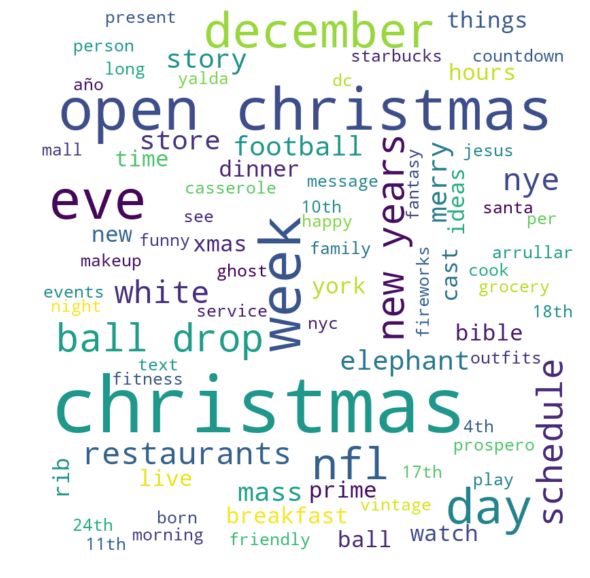

In [41]:
from matplotlib import pyplot as plt
from wordcloud import WordCloud

wordcloud = WordCloud(width = 800, height = 800, background_color ='white', min_font_size = 10).generate(' '.join(correlated))

plt.figure(figsize=[20,10])
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")